In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import data and take a first look

In [2]:
nba_players_data = pd.read_csv('..\\data\\csv\\nba_players_data.csv')
nba_players_data.head(10) 

,Players,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,LeBron James,37,LAL,NBA,PF,56,56,37.2,11.4,21.8,...,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
1,Kevin Durant,33,BRK,NBA,PF,55,55,37.2,10.5,20.3,...,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
2,Chris Paul,36,PHO,NBA,PG,65,65,32.9,5.6,11.3,...,0.837,0.3,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7
3,Carmelo Anthony,37,LAL,NBA,PF,69,3,26.0,4.6,10.5,...,0.830,0.9,3.3,4.2,1.0,0.7,0.8,0.9,2.4,13.3
4,James Harden,32,TOT,NBA,PG,65,65,37.2,6.3,15.3,...,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
5,Russell Westbrook,33,LAL,NBA,PG,78,78,34.3,7.0,15.8,...,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
6,Stephen Curry,33,GSW,NBA,PG,64,64,34.5,8.4,19.1,...,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
7,Anthony Davis,28,LAL,NBA,C,40,40,35.1,9.3,17.4,...,0.713,2.7,7.2,9.9,3.1,1.2,2.3,2.1,2.4,23.2
8,Dwight Howard,36,LAL,NBA,C,60,27,16.2,2.2,3.7,...,0.658,2.0,4.0,5.9,0.6,0.6,0.6,0.8,1.9,6.2
9,LaMarcus Aldridge,36,BRK,NBA,C,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


Check for missing data

In [3]:
nba_players_data.isnull().sum()

Players    0
Age        0
Tm         0
Lg         0
Pos        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [4]:
nba_players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Players  45 non-null     object 
 1   Age      45 non-null     int64  
 2   Tm       45 non-null     object 
 3   Lg       45 non-null     object 
 4   Pos      45 non-null     object 
 5   G        45 non-null     int64  
 6   GS       45 non-null     int64  
 7   MP       45 non-null     float64
 8   FG       45 non-null     float64
 9   FGA      45 non-null     float64
 10  FG%      45 non-null     float64
 11  3P       45 non-null     float64
 12  3PA      45 non-null     float64
 13  3P%      45 non-null     float64
 14  2P       45 non-null     float64
 15  2PA      45 non-null     float64
 16  2P%      45 non-null     float64
 17  eFG%     45 non-null     float64
 18  FT       45 non-null     float64
 19  FTA      45 non-null     float64
 20  FT%      45 non-null     float64
 21  ORB      45 non-nu

Looks like i dont have any missing values in my data

Lets see who is oldest player

(0.0, 50.0)

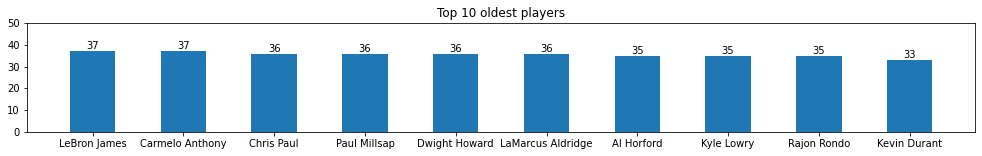

In [5]:
#Sort players by age
players_by_age = nba_players_data.sort_values(by='Age',ascending=False).reset_index()
plt.figure(figsize=(17,2))
# Create bars from Players and Age columns
plt.bar('Players','Age', data=players_by_age[:10], width=.5)
plt.title('Top 10 oldest players')
# add bar text 
for i in range(len(players_by_age[:10])):
    plt.text(i,players_by_age['Age'][i],players_by_age['Age'][i],ha='center',va='bottom')
plt.ylim(0,50)

Lets see which team has most all star players

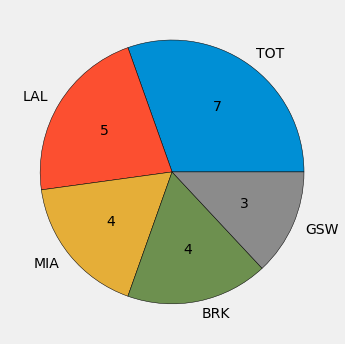

In [6]:
slices = nba_players_data['Tm'].value_counts().sort_values(ascending=False)
pie_labels = nba_players_data['Tm']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
plt.pie(slices[:5], labels=slices[:5].index, autopct=lambda x: '{:.0f}'.format(x*slices[:5].sum()/100),wedgeprops={'edgecolor':'black'})
plt.tight_layout()

Looks like LAL has most nba all stars in team. Unfortunately TOT value is representing players with more than one team in whole season. I missed that when i was scraping from website.

Lets see which players doesnt have assigned team

In [7]:
players_with_no_teams = nba_players_data.loc[nba_players_data['Tm'] == 'TOT']
print(f'Looks like i have {len(players_with_no_teams)} players with no team name.')
players_with_no_teams

Looks like i have 7 players with no team name.


,Players,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
4,James Harden,32,TOT,NBA,PG,65,65,37.2,6.3,15.3,...,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
22,DeMarcus Cousins,31,TOT,NBA,C,48,7,15.0,3.1,6.8,...,0.760,1.5,4.1,5.6,1.5,0.7,0.4,1.8,2.9,9.0
25,Paul Millsap,36,TOT,NBA,C,33,1,11.4,1.4,3.5,...,0.708,1.2,2.2,3.5,0.9,0.3,0.4,0.6,2.0,3.5
26,Rajon Rondo,35,TOT,NBA,PG,39,1,17.9,1.7,4.5,...,0.731,0.4,2.4,2.8,4.4,0.8,0.2,1.7,1.4,4.8
37,Andre Drummond,28,TOT,NBA,C,73,36,19.7,3.4,5.9,...,0.524,3.1,6.2,9.3,1.8,1.1,0.9,1.6,2.6,7.9
40,Domantas Sabonis,25,TOT,NBA,"C,PF",62,61,34.5,7.1,12.5,...,0.741,3.2,8.9,12.1,5.2,1.0,0.4,3.1,3.3,18.9
41,Isaiah Thomas,32,TOT,NBA,PG,22,1,15.1,3.0,7.6,...,0.846,0.2,1.1,1.3,1.5,0.3,0.2,0.7,1.5,8.4


I will use public api to get current team for each player http://www.balldontlie.io/

In [10]:
import requests

# main link to connect and get players
req_link='https://www.balldontlie.io/api/v1/players'

missed_teams_with_players = {}
# add this to end of req_link ?search=davis
for player in players_with_no_teams['Players']:
    # get ride of first name, need only last name for request
    # index for white space to separate first and last name
    white_space_index = player.index(' ')
    player_last_name = player[white_space_index+1:]
    player_first_name = player[:white_space_index]
    # fully request link for api
    req_link_ext = f'https://www.balldontlie.io/api/v1/players?search={player_last_name}'
    response = requests.get(req_link_ext)
    # make sure response status is 200
    if response.status_code == 200:
        player_json_response = response.json()
        if player_json_response['data'][0]['first_name'] == player_first_name and player_json_response['data'][0]['last_name'] == player_last_name:
            player_current_team = player_json_response['data'][0]["team"]["full_name"]
            missed_teams_with_players[player] = player_current_team[:3].upper()
            print(player_first_name,player_last_name, 'current team is',player_current_team)
        else:
            print('no match')
    elif response.status_code == 404:
        print('Not Found.')

James Harden current team is Philadelphia 76ers
DeMarcus Cousins current team is Denver Nuggets
no match
Rajon Rondo current team is Cleveland Cavaliers
Andre Drummond current team is Brooklyn Nets
no match
no match


Here is a dictionary with player:missed_team

In [12]:
# add missing players 
missed_teams_with_players['Domantas Sabonis'] = 'SAC'
missed_teams_with_players['Isaiah Thomas'] = 'CHA'
missed_teams_with_players['Paul Millsap'] = 'PHI'
missed_teams_with_players

{'James Harden': 'PHI',
 'DeMarcus Cousins': 'DEN',
 'Rajon Rondo': 'CLE',
 'Andre Drummond': 'BRO',
 'Domantas Sabonis': 'SAC',
 'Isaiah Thomas': 'CHA',
 'Paul Millsap': 'PHI'}

Put this into dataframe

In [16]:
for key,value in missed_teams_with_players.items():
    index_player_to_update = nba_players_data.index[nba_players_data['Players'] == key]
    nba_players_data.iloc[index_player_to_update,2] = value
    print(index_player_to_update)

[4]
[22]
[26]
[37]
[40]
[41]
[25]


In [18]:
nba_players_data.iloc[4,2]

'TOT'

Looks like i can get only 4 players from this api...